In [1]:
import findspark

In [2]:
findspark.init()

In [3]:
import pyspark
sc = pyspark.SparkContext()

In [4]:
sc

In [6]:
pwd

u'/Users/Clarita/Desktop/tfm'

In [5]:
from pyspark.sql import SQLContext
from pyspark.sql.types import *

In [6]:
sqlContext = SQLContext(sc)

# Exploring and analysing the dataset

In [7]:
df = sqlContext.read.csv('marketing_pax.csv', header=True, sep='^', inferSchema=True)

In [13]:
df.dtypes

[('rloc', 'string'),
 ('full_name', 'string'),
 ('gender', 'string'),
 ('age', 'int'),
 ('date_of_birth', 'timestamp'),
 ('document_type', 'string'),
 ('document_number', 'string'),
 ('document_country', 'string'),
 ('nationality', 'string'),
 ('fqtv_data', 'string'),
 ('general_status', 'string'),
 ('boarding_status', 'string'),
 ('acceptance_status', 'string'),
 ('bag_status', 'string'),
 ('customer_accepted', 'string'),
 ('checkin_location', 'string'),
 ('boarded_in_all_legs_flag', 'boolean'),
 ('cabin_code', 'string'),
 ('booking_class_code', 'string'),
 ('airline_code', 'string'),
 ('flight_number', 'string'),
 ('departure_date_leg', 'timestamp'),
 ('quality_index', 'double'),
 ('creation_date', 'timestamp'),
 ('advance_purchase', 'int'),
 ('creator_office_id', 'string'),
 ('creator_iata_number', 'int'),
 ('creator_gds_code', 'string'),
 ('creator_city_code', 'string'),
 ('creator_lat', 'double'),
 ('creator_lon', 'double'),
 ('creator_country_code', 'string'),
 ('creator_continen

In [15]:
df.count()

9546302

In [16]:
df.head()

Row(rloc=u'60Z666', full_name=u'/MUZASDQUE', gender=u'F', age=None, date_of_birth=None, document_type=None, document_number=None, document_country=None, nationality=None, fqtv_data=u'016037921MK/BXGE/', general_status=u'FD', boarding_status=u'CL', acceptance_status=u'FI', bag_status=u'IG', customer_accepted=u'CAC', checkin_location=u'W', boarded_in_all_legs_flag=True, cabin_code=u'Y', booking_class_code=u'W', airline_code=u'XX', flight_number=u'2075', departure_date_leg=datetime.datetime(2013, 6, 23, 0, 0), quality_index=0.5, creation_date=datetime.datetime(2015, 5, 3, 0, 0), advance_purchase=49, creator_office_id=u'LEUXXMM42', creator_iata_number=56495383, creator_gds_code=u'XX', creator_city_code=u'LEU', creator_lat=42.338611, creator_lon=1.409167, creator_country_code=u'ES', creator_continent_name=u'Europe', creator_channel_code=u'E', booking_status_code=u'HK', cabin_code_seg=u'Y', booking_class_code_seg=u'W', pos_office_id=u'LEUXXMM42', pos_iata_number=56495383, pos_gds_code=u'M5',

In [9]:
df.printSchema()

root
 |-- rloc: string (nullable = true)
 |-- full_name: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- date_of_birth: timestamp (nullable = true)
 |-- document_type: string (nullable = true)
 |-- document_number: string (nullable = true)
 |-- document_country: string (nullable = true)
 |-- nationality: string (nullable = true)
 |-- fqtv_data: string (nullable = true)
 |-- general_status: string (nullable = true)
 |-- boarding_status: string (nullable = true)
 |-- acceptance_status: string (nullable = true)
 |-- bag_status: string (nullable = true)
 |-- customer_accepted: string (nullable = true)
 |-- checkin_location: string (nullable = true)
 |-- boarded_in_all_legs_flag: boolean (nullable = true)
 |-- cabin_code: string (nullable = true)
 |-- booking_class_code: string (nullable = true)
 |-- airline_code: string (nullable = true)
 |-- flight_number: string (nullable = true)
 |-- departure_date_leg: timestamp (nullable = true)


In [14]:
df.show(2, truncate=True)

+------+-------------+------+----+-------------+-------------+---------------+----------------+-----------+-----------------+--------------+---------------+-----------------+----------+-----------------+----------------+------------------------+----------+------------------+------------+-------------+--------------------+-------------+--------------------+----------------+-----------------+-------------------+----------------+-----------------+-----------+-----------+--------------------+----------------------+--------------------+-------------------+--------------+----------------------+-------------+---------------+------------+-------------+---------+--------+----------------+------------------+----------------+-----------+---------+---------+------------------+--------------------+---------+--------+--------+----------------+------------------+-----------------+-------+-------+----------------+-----------------+-----------+------------------+---------+----------+-------------------

In [17]:
len(df.columns), df.columns

(66,
 ['rloc',
  'full_name',
  'gender',
  'age',
  'date_of_birth',
  'document_type',
  'document_number',
  'document_country',
  'nationality',
  'fqtv_data',
  'general_status',
  'boarding_status',
  'acceptance_status',
  'bag_status',
  'customer_accepted',
  'checkin_location',
  'boarded_in_all_legs_flag',
  'cabin_code',
  'booking_class_code',
  'airline_code',
  'flight_number',
  'departure_date_leg',
  'quality_index',
  'creation_date',
  'advance_purchase',
  'creator_office_id',
  'creator_iata_number',
  'creator_gds_code',
  'creator_city_code',
  'creator_lat',
  'creator_lon',
  'creator_country_code',
  'creator_continent_name',
  'creator_channel_code',
  'booking_status_code',
  'cabin_code_seg',
  'booking_class_code_seg',
  'pos_office_id',
  'pos_iata_number',
  'pos_gds_code',
  'pos_city_code',
  'pos_lat',
  'pos_lon',
  'pos_country_code',
  'pos_continent_code',
  'pos_channel_code',
  'board_point',
  'board_lat',
  'board_lon',
  'board_country_code'

In [12]:
df.select('gender', 'age').show(5)

+------+----+
|gender| age|
+------+----+
|     F|null|
|     M|null|
|     M|  33|
|     F|  40|
|     F|null|
+------+----+
only showing top 5 rows



In [18]:
df.select('rloc').show(5)

+------+
|  rloc|
+------+
|60Z666|
|612666|
|818666|
|827666|
|8PD666|
+------+
only showing top 5 rows



In [13]:
df.select('Document_number').show(5)

+---------------+
|Document_number|
+---------------+
|           null|
|           null|
|      39939WV44|
|       5719T651|
|           null|
+---------------+
only showing top 5 rows



In [10]:
import pandas as pd
import requests

In [23]:
df.groupBy('rloc').count().show(10)

+------+-----+
|  rloc|count|
+------+-----+
|MW0669|    2|
|DKA66P|    4|
|MIJ66V|    2|
|ARB66H|    4|
|9KS66J|    2|
|NFB66J|    8|
|ZJD66K|    8|
|JFB676|    4|
|JWJ670|    4|
|KW3670|    6|
+------+-----+
only showing top 10 rows



In [8]:
from pyspark.sql import *
from pyspark.sql.functions import *

In [28]:
df.agg(countDistinct(df.rloc)).show()

+--------------------+
|count(DISTINCT rloc)|
+--------------------+
|             2605835|
+--------------------+



In [13]:
#contamos el número de billetes existente (hay muchos null)
df.filter(df.document_number.isNotNull()).count()

2636677

# Cleansing and preparing the dataset

In [9]:
#creamos el dataframe vuelos
df.createOrReplaceTempView("vuelos")

In [10]:
#contamos el número de billetes existente (hay muchos null)
sqlDF = sqlContext.sql("SELECT COUNT(document_number) FROM vuelos WHERE document_number IS NOT NULL")

In [34]:
sqlDF.show()

+----------------------+
|count(document_number)|
+----------------------+
|               2636677|
+----------------------+



In [11]:
sqlDF = sqlContext.sql("SELECT COUNT(*), COUNT(DISTINCT rloc) FROM vuelos")

In [36]:
sqlDF.show()

+--------+--------------------+
|count(1)|count(DISTINCT rloc)|
+--------+--------------------+
| 9546302|             2605835|
+--------+--------------------+



In [12]:
#departure_date_leg count
sqlDF = sqlContext.sql("SELECT COUNT(departure_date_leg) FROM vuelos")

In [38]:
sqlDF.show()

+-------------------------+
|count(departure_date_leg)|
+-------------------------+
|                  9546300|
+-------------------------+



In [13]:
df.createOrReplaceTempView("fechas_salida_vuelos")

In [14]:
#departure_date_leg count

sqlDF = sqlContext.sql(sqlQuery="select departure_date_leg, count(*)\
from vuelos group by departure_date_leg order by 1")

In [92]:
sqlDF.orderBy(desc("departure_date_leg")).show(150)
#selecciono hasta el 01/01/2014 

+--------------------+--------+
|  departure_date_leg|count(1)|
+--------------------+--------+
|2014-07-14 00:00:...|       1|
|2014-06-04 00:00:...|       1|
|2014-05-02 00:00:...|       1|
|2014-04-30 00:00:...|       2|
|2014-04-29 00:00:...|       1|
|2014-04-26 00:00:...|       6|
|2014-04-14 00:00:...|       7|
|2014-04-13 00:00:...|       1|
|2014-04-12 00:00:...|       4|
|2014-04-11 00:00:...|       3|
|2014-04-10 00:00:...|       3|
|2014-04-09 00:00:...|      28|
|2014-04-08 00:00:...|    9273|
|2014-04-07 00:00:...|   12259|
|2014-04-06 00:00:...|   14274|
|2014-04-05 00:00:...|   13120|
|2014-04-04 00:00:...|   20702|
|2014-04-03 00:00:...|   19973|
|2014-04-02 00:00:...|   17897|
|2014-04-01 00:00:...|   16563|
|2014-03-31 00:00:...|   19681|
|2014-03-30 00:00:...|   20607|
|2014-03-29 00:00:...|   18637|
|2014-03-28 00:00:...|   23506|
|2014-03-27 00:00:...|   22086|
|2014-03-26 00:00:...|   19947|
|2014-03-25 00:00:...|   18963|
|2014-03-24 00:00:...|   21594|
|2014-03

In [83]:
sqlDF.orderBy(asc("departure_date_leg")).show(100)
#veo que a partir del 01/01/2013 hay más volumen de datos

+--------------------+--------+
|  departure_date_leg|count(1)|
+--------------------+--------+
|                null|       2|
|2012-06-27 00:00:...|       1|
|2012-07-05 00:00:...|       2|
|2012-07-12 00:00:...|       2|
|2012-07-14 00:00:...|       2|
|2012-07-15 00:00:...|       2|
|2012-07-19 00:00:...|       1|
|2012-07-22 00:00:...|       1|
|2012-07-23 00:00:...|       2|
|2012-08-01 00:00:...|       4|
|2012-08-03 00:00:...|       1|
|2012-08-06 00:00:...|      32|
|2012-08-09 00:00:...|       1|
|2012-08-16 00:00:...|       5|
|2012-08-20 00:00:...|       4|
|2012-08-23 00:00:...|       1|
|2012-08-24 00:00:...|       1|
|2012-08-30 00:00:...|       2|
|2012-09-03 00:00:...|       1|
|2012-09-04 00:00:...|       4|
|2012-09-10 00:00:...|       2|
|2012-09-12 00:00:...|       1|
|2012-09-15 00:00:...|       2|
|2012-09-16 00:00:...|       2|
|2012-09-18 00:00:...|       2|
|2012-09-19 00:00:...|       1|
|2012-09-20 00:00:...|       3|
|2012-09-30 00:00:...|       2|
|2012-10

In [22]:
sqlDF.select(last('departure_date_leg', ignorenulls=True)).show()

+------------------------------+
|last(departure_date_leg, true)|
+------------------------------+
|          2014-07-14 00:00:...|
+------------------------------+



In [82]:
sqlDF.select(first('departure_date_leg', ignorenulls=True)).show()

+-------------------------------+
|first(departure_date_leg, true)|
+-------------------------------+
|           2012-06-27 00:00:...|
+-------------------------------+



In [15]:
fechas_vuelos = df.groupBy(df['departure_date_leg']).count().toPandas().sort_values(by='count', ascending=False)

In [ ]:
vuelos_por_fecha = pd.DataFrame(fechas_vuelos)

In [23]:
vuelos_por_fecha.sort_values('count')

In [ ]:
#vemos dónde empieza a haber un volumen de datos más homogéneo
vuelos_por_fecha.nsmallest(100, 'count')

In [ ]:
vuelos_por_fecha.nlargest(150, 'count')

In [16]:
#acotamos los datos al rango de fechas con un volumen homogéneo: 365 días
sqlDF2 = sqlContext.sql(sqlQuery="select * from vuelos where departure_date_leg between '2013-01-01' and '2014-01-01'\
and document_number is not null \
and booking_status_code='HK'\
and quality_index = 1")

In [17]:
sqlDF2.registerTempTable("vuelos_clientes")

In [111]:
sqlDF2.count()

526851

In [113]:
sqlDF2.agg(countDistinct(sqlDF2.document_number)).show()

+-------------------------------+
|count(DISTINCT document_number)|
+-------------------------------+
|                         175817|
+-------------------------------+



In [114]:
sqlDF2.groupBy('document_number').count().show(10)

+---------------+-----+
|document_number|count|
+---------------+-----+
|      66289BS28|    2|
|      708061476|    4|
|      20571FT30|    3|
|       69155025|    2|
|      991926414|    2|
|       78642406|    4|
|      97657BL93|   15|
|       41748915|    3|
|      31068BM21|    2|
|      15064BY96|    2|
+---------------+-----+
only showing top 10 rows



In [18]:
#documentos únicos
sqlDF3 = sqlContext.sql(sqlQuery="select document_number, count(*) \
from (select document_number, gender, date_of_birth, nationality, count(*) as count \
from vuelos_clientes group by document_number, gender, date_of_birth, nationality) as a group by document_number \
having count(*)=1")


In [117]:
#vemos que ya no hay documentos duplicados
sqlDF3.groupBy('document_number').count().show(10)

+---------------+-----+
|document_number|count|
+---------------+-----+
|       78642406|    1|
|       2828Y769|    1|
|      XP325ZZ17|    1|
|      33772PI56|    1|
|      02376W459|    1|
|      29318BV96|    1|
|      9115254OW|    1|
|      770625469|    1|
|      71263FW84|    1|
|      08869BO31|    1|
+---------------+-----+
only showing top 10 rows



In [118]:
sqlDF3.count()

175333

In [19]:
sqlDF3.registerTempTable("documentos_unicos")

In [20]:
sqlDF4 = sqlContext.sql(sqlQuery = "select a.* from vuelos_clientes \
as a inner join documentos_unicos as b on a.document_number = b.document_number")

In [21]:
sqlDF4.registerTempTable("clientes_unicos")

In [22]:
clientes_unicos = sqlDF4.toPandas()

KeyboardInterrupt: 

In [187]:
clientes_unicos.to_csv('clientes_unicos.csv', sep=',')

In [124]:
sqlDF4.count()

523541

In [125]:
sqlDF4.agg(countDistinct(sqlDF4.document_number)).show()

+-------------------------------+
|count(DISTINCT document_number)|
+-------------------------------+
|                         175333|
+-------------------------------+



In [126]:
sqlDF4.groupBy('document_number').count().show(10)

+---------------+-----+
|document_number|count|
+---------------+-----+
|      000744336|    2|
|      00152Y444|    2|
|      002946569|    4|
|      00453BS41|    1|
|      00517BF34|    2|
|      00714BO74|    2|
|      00908BD78|    2|
|      01060BK97|    2|
|      013178711|    4|
|      01651Y243|    4|
+---------------+-----+
only showing top 10 rows



## Preparing the dataframe for the clustering

In [23]:
#creamos las columnas que nos interesan
sqlDF6 = sqlContext.sql(sqlQuery="select document_number,\
count(distinct(concat(document_number, ',', rloc))) as frecuency, \
datediff(to_date('2014-01-01 00:00:00'), to_date(max(departure_date_leg))) as recency, \
sum(revenue_amount_seg) as money \
from clientes_unicos group by document_number")

In [24]:
sqlDF6.registerTempTable('rfm_doc_unicos')

In [282]:
sqlDF6.select('frecuency', 'recency', 'money', 'document_number').show(5)

+---------+-------+------+---------------+
|frecuency|recency| money|document_number|
+---------+-------+------+---------------+
|        1|     28|221.26|      000744336|
|        1|    171| 205.0|      00152Y444|
|        1|    282|291.68|      002946569|
|        1|     22|250.51|      00453BS41|
|        1|     32| 313.0|      00517BF34|
+---------+-------+------+---------------+
only showing top 5 rows



In [25]:
from pyspark.sql import HiveContext

In [26]:
sqlContext = HiveContext(sc)

In [27]:
hive_context = HiveContext(sc)

# RFM

#### After creating the dataframe with the neccesary columns, we are going to perform an analysis on the data obtained, in order to cluster the potential clients and study their behaviour

In [28]:
from pyspark.ml.clustering import KMeans

In [29]:
dataset_rfm = hive_context.table('rfm_doc_unicos')

In [257]:
dataset_rfm.show()

+---------------+---------+------------------+-------+
|document_number|frecuency|             money|recency|
+---------------+---------+------------------+-------+
|      000744336|        1|            221.26|     28|
|      00152Y444|        1|             205.0|    171|
|      002946569|        1|            291.68|    282|
|      00453BS41|        1|            250.51|     22|
|      00517BF34|        1|             313.0|     32|
|      00714BO74|        1|             313.0|     32|
|      00908BD78|        1|             266.0|    197|
|      01060BK97|        1|               0.0|     35|
|      013178711|        1|151.03999999999996|    328|
|      01651Y243|        1|504.15999999999997|    113|
|      017118282|        1|             248.3|    307|
|       01795150|        1|             121.0|     99|
|      02054BY00|        1|               0.0|     49|
|      02240BO12|        1|              82.5|     52|
|      02376W459|        1|              2.96|     26|
|      024

In [288]:
type(dataset_rfm)

pyspark.sql.dataframe.DataFrame

In [30]:
cols = dataset_rfm.columns

In [31]:
from pyspark.sql.types import DoubleType

In [32]:
dataset_rfm.frecuency.cast("integer").alias('frecuencies')

Column<CAST(frecuency AS INT) AS `frecuencies`>

In [292]:
dataset_rfm.dtypes

[('document_number', 'string'),
 ('frecuency', 'bigint'),
 ('money', 'double'),
 ('recency', 'int')]

In [250]:
dataset_rfm.head()

KeyboardInterrupt: 

In [271]:
dataset_rfm.count()

175333

In [33]:
import pandas as pd
import numpy as np

In [34]:
numericCols = ['frecuency', 'recency', 'money']

In [35]:
rfm = dataset_rfm[numericCols]

In [296]:
rfm.dtypes

[('frecuency', 'bigint'), ('recency', 'int'), ('money', 'double')]

In [58]:
##rfm_final = rfm.withColumn('avgmoney', rfm.money / rfm.frecuency)

In [36]:
rfm.fillna(0)

DataFrame[frecuency: bigint, recency: int, money: double]

In [254]:
rfm.describe().show()

KeyboardInterrupt: 

In [296]:
rfm.groupby().('money').collect()

[Row(max(money)=38767.9)]

In [297]:
rfm.filter(rfm_final.money > 5000).count()

1216

In [67]:
rfm.orderBy(rfm_final.money.desc()).show(10)

AnalysisException: u'Detected cartesian product for INNER join between logical plans\nAggregate [document_number#6], [count(distinct concat(document_number#6, ,, rloc#0)) AS frecuency#448L, datediff(16071, to_date(cast(max(departure_date_leg#21) as date))) AS recency#450, sum(revenue_amount_seg#62) AS money#449, (sum(revenue_amount_seg#62) / cast(count(distinct concat(document_number#6, ,, rloc#0)) as double)) AS money_avg#1300]\n+- Project [rloc#0, document_number#6, departure_date_leg#21, revenue_amount_seg#62]\n   +- Join Inner, (document_number#6 = document_number#317)\n      :- Project [rloc#0, document_number#6, departure_date_leg#21, revenue_amount_seg#62]\n      :  +- Filter (((isnotnull(departure_date_leg#21) && isnotnull(quality_index#22)) && isnotnull(booking_status_code#34)) && ((((cast(departure_date_leg#21 as string) >= 2013-01-01) && (cast(departure_date_leg#21 as string) <= 2014-01-01)) && isnotnull(document_number#6)) && ((booking_status_code#34 = HK) && (quality_index#22 = 1.0))))\n      :     +- Relation[rloc#0,full_name#1,gender#2,age#3,date_of_birth#4,document_type#5,document_number#6,document_country#7,nationality#8,fqtv_data#9,general_status#10,boarding_status#11,acceptance_status#12,bag_status#13,customer_accepted#14,checkin_location#15,boarded_in_all_legs_flag#16,cabin_code#17,booking_class_code#18,airline_code#19,flight_number#20,departure_date_leg#21,quality_index#22,creation_date#23,... 42 more fields] csv\n      +- Project [document_number#317]\n         +- Filter (count(1)#305L = 1)\n            +- Aggregate [document_number#317], [document_number#317, count(1) AS count(1)#305L]\n               +- Aggregate [document_number#317, gender#313, date_of_birth#315, nationality#319], [document_number#317]\n                  +- Project [gender#313, date_of_birth#315, document_number#317, nationality#319]\n                     +- Filter (((isnotnull(quality_index#333) && isnotnull(booking_status_code#345)) && isnotnull(departure_date_leg#332)) && ((((cast(departure_date_leg#332 as string) >= 2013-01-01) && (cast(departure_date_leg#332 as string) <= 2014-01-01)) && isnotnull(document_number#317)) && ((booking_status_code#345 = HK) && (quality_index#333 = 1.0))))\n                        +- Relation[rloc#311,full_name#312,gender#313,age#314,date_of_birth#315,document_type#316,document_number#317,document_country#318,nationality#319,fqtv_data#320,general_status#321,boarding_status#322,acceptance_status#323,bag_status#324,customer_accepted#325,checkin_location#326,boarded_in_all_legs_flag#327,cabin_code#328,booking_class_code#329,airline_code#330,flight_number#331,departure_date_leg#332,quality_index#333,creation_date#334,... 42 more fields] csv\nand\nBroadcastHint\n+- Aggregate [stddev_pop(cast(frecuency#448L as double)) AS frecuency_stddev#1320, stddev_pop(cast(recency#450 as double)) AS recency_stddev#1330, stddev_pop(money#449) AS money_stddev#1340, stddev_pop(money_avg#1300) AS money_avg_stddev#1350, avg(frecuency#448L) AS frecuency_avg#1352, avg(cast(recency#450 as bigint)) AS recency_avg#1354, avg(money#449) AS money_avg#1356, avg(money_avg#1300) AS money_avg_avg#1358]\n   +- Aggregate [document_number#6], [count(distinct concat(document_number#6, ,, rloc#0)) AS frecuency#448L, datediff(16071, to_date(cast(max(departure_date_leg#21) as date))) AS recency#450, sum(revenue_amount_seg#62) AS money#449, (sum(revenue_amount_seg#62) / cast(count(distinct concat(document_number#6, ,, rloc#0)) as double)) AS money_avg#1300]\n      +- Project [rloc#0, document_number#6, departure_date_leg#21, revenue_amount_seg#62]\n         +- Join Inner, (document_number#6 = document_number#317)\n            :- Project [rloc#0, document_number#6, departure_date_leg#21, revenue_amount_seg#62]\n            :  +- Filter (((isnotnull(departure_date_leg#21) && isnotnull(quality_index#22)) && isnotnull(booking_status_code#34)) && ((((cast(departure_date_leg#21 as string) >= 2013-01-01) && (cast(departure_date_leg#21 as string) <= 2014-01-01)) && isnotnull(document_number#6)) && ((booking_status_code#34 = HK) && (quality_index#22 = 1.0))))\n            :     +- Relation[rloc#0,full_name#1,gender#2,age#3,date_of_birth#4,document_type#5,document_number#6,document_country#7,nationality#8,fqtv_data#9,general_status#10,boarding_status#11,acceptance_status#12,bag_status#13,customer_accepted#14,checkin_location#15,boarded_in_all_legs_flag#16,cabin_code#17,booking_class_code#18,airline_code#19,flight_number#20,departure_date_leg#21,quality_index#22,creation_date#23,... 42 more fields] csv\n            +- Project [document_number#317]\n               +- Filter (count(1)#305L = 1)\n                  +- Aggregate [document_number#317], [document_number#317, count(1) AS count(1)#305L]\n                     +- Aggregate [document_number#317, gender#313, date_of_birth#315, nationality#319], [document_number#317]\n                        +- Project [gender#313, date_of_birth#315, document_number#317, nationality#319]\n                           +- Filter (((isnotnull(quality_index#333) && isnotnull(booking_status_code#345)) && isnotnull(departure_date_leg#332)) && ((((cast(departure_date_leg#332 as string) >= 2013-01-01) && (cast(departure_date_leg#332 as string) <= 2014-01-01)) && isnotnull(document_number#317)) && ((booking_status_code#345 = HK) && (quality_index#333 = 1.0))))\n                              +- Relation[rloc#311,full_name#312,gender#313,age#314,date_of_birth#315,document_type#316,document_number#317,document_country#318,nationality#319,fqtv_data#320,general_status#321,boarding_status#322,acceptance_status#323,bag_status#324,customer_accepted#325,checkin_location#326,boarded_in_all_legs_flag#327,cabin_code#328,booking_class_code#329,airline_code#330,flight_number#331,departure_date_leg#332,quality_index#333,creation_date#334,... 42 more fields] csv\nJoin condition is missing or trivial.\nUse the CROSS JOIN syntax to allow cartesian products between these relations.;'

In [37]:
from pyspark.sql.functions import stddev_pop, avg, broadcast

In [38]:
cols = rfm.columns

In [39]:
stats = (rfm.groupBy().agg(*([stddev_pop(x).alias(x + '_stddev') for x in cols] + [avg(x).alias(x + '_avg') for x in cols])))




In [301]:
rfm.dtypes

[('frecuency', 'bigint'), ('recency', 'int'), ('money', 'double')]

In [40]:
rfm = rfm.crossJoin(broadcast(stats))

In [303]:
rfm.dtypes

[('frecuency', 'bigint'),
 ('recency', 'int'),
 ('money', 'double'),
 ('frecuency_stddev', 'double'),
 ('recency_stddev', 'double'),
 ('money_stddev', 'double'),
 ('frecuency_avg', 'double'),
 ('recency_avg', 'double'),
 ('money_avg', 'double')]

In [41]:
exprs = [(rfm[x] - rfm[x + '_avg']) / rfm[x + '_stddev'] for x in cols]

In [305]:
rfm.select(exprs).show()

+------------------------------------------------+------------------------------------------+------------------------------------+
|((frecuency - frecuency_avg) / frecuency_stddev)|((recency - recency_avg) / recency_stddev)|((money - money_avg) / money_stddev)|
+------------------------------------------------+------------------------------------------+------------------------------------+
|                             -0.2808482537018044|                       -1.0054123881526456|                 -0.3402957172676322|
|                             -0.2808482537018044|                       0.34255203380677673|                 -0.3576228125560959|
|                             -0.2808482537018044|                        1.3888740676354192|                 -0.2652542627649498|
|                             -0.2808482537018044|                       -1.0619703359271668|                -0.30912612703469466|
|                             -0.2808482537018044|                       -0.9677070

In [106]:
rfm.show()

+---------+-------+------------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+
|frecuency|recency|             money|  frecuency_stddev|    recency_stddev|     money_stddev|     frecuency_avg|      recency_avg|        money_avg|
+---------+-------+------------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+
|        1|     28|            221.26|0.7551282445918905|106.08588599996797|938.4146465002593|1.2120764488145415|134.6600639925171|540.5984852252573|
|        1|    171|             205.0|0.7551282445918905|106.08588599996797|938.4146465002593|1.2120764488145415|134.6600639925171|540.5984852252573|
|        1|    282|            291.68|0.7551282445918905|106.08588599996797|938.4146465002593|1.2120764488145415|134.6600639925171|540.5984852252573|
|        1|     22|            250.51|0.7551282445918905|106.08588599996797|938.4146465002593|1.2120

In [239]:
type(rfm)

pyspark.sql.dataframe.DataFrame

In [42]:
rfm_final = rfm.toPandas()

In [307]:
rfm_final.head(2)

,frecuency,recency,money,frecuency_stddev,recency_stddev,money_stddev,frecuency_avg,recency_avg,money_avg
0,1,28,221.26,0.755128,106.085886,938.414647,1.212076,134.660064,540.598485
1,1,171,205.00,0.755128,106.085886,938.414647,1.212076,134.660064,540.598485


In [43]:
rfm_final = rfm.select(exprs).toPandas()

In [311]:
rfm_final.head(2)

,((frecuency - frecuency_avg) / frecuency_stddev),((recency - recency_avg) / recency_stddev),((money - money_avg) / money_stddev)
0,-0.280848,-1.005412,-0.340296
1,-0.280848,0.342552,-0.357623


In [45]:
rfm_final.columns = ['frecuency_scaled', 'recency_scaled', 'money_scaled']

In [375]:
rfm_final.head(2)

,frecuency_scaled,recency_scaled,money_scaled,cluster
0,-0.280848,-1.005412,-0.340296,0
1,-0.280848,0.342552,-0.357623,2


In [46]:
from numpy import array
from math import sqrt
from pyspark.ml.clustering import KMeans, KMeansModel

In [47]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm

In [48]:
kmeans = KMeans(n_clusters= 4)

In [49]:
clusters = kmeans.fit_predict(rfm_final)

In [50]:
rfm_final['cluster'] = clusters

In [411]:
rfm_final.head(5)

,frecuency_scaled,recency_scaled,money_scaled,cluster
0,-0.280848,-1.005412,-0.340296,1
1,-0.280848,0.342552,-0.357623,0
2,-0.280848,1.388874,-0.265254,0
3,-0.280848,-1.061970,-0.309126,1
4,-0.280848,-0.967707,-0.242535,1


In [323]:
rfm.toPandas()

,frecuency,recency,money,frecuency_stddev,recency_stddev,money_stddev,frecuency_avg,recency_avg,money_avg
0,1,28,221.26,0.755128,106.085886,938.414647,1.212076,134.660064,540.598485
1,1,171,205.00,0.755128,106.085886,938.414647,1.212076,134.660064,540.598485
2,1,282,291.68,0.755128,106.085886,938.414647,1.212076,134.660064,540.598485
3,1,22,250.51,0.755128,106.085886,938.414647,1.212076,134.660064,540.598485
4,1,32,313.00,0.755128,106.085886,938.414647,1.212076,134.660064,540.598485
5,1,32,313.00,0.755128,106.085886,938.414647,1.212076,134.660064,540.598485
6,1,197,266.00,0.755128,106.085886,938.414647,1.212076,134.660064,540.598485
7,1,35,0.00,0.755128,106.085886,938.414647,1.212076,134.660064,540.598485
8,1,328,151.04,0.755128,106.085886,938.414647,1.212076,134.660064,540.598485
9,1,113,504.16,0.755128,106.085886,938.414647,1.212076,134.660064,540.598485


In [51]:
dataset_rfm = dataset_rfm.toPandas()

In [52]:
dataset_rfm['cluster'] = rfm_final['cluster']

In [53]:
dataset_rfm.head(2)

,document_number,frecuency,recency,money,cluster
0,000744336,1,28,221.26,1
1,00152Y444,1,171,205.00,0


In [56]:
dataset_rfm.sort_values('recency', ascending=True)

,document_number,frecuency,recency,money,cluster
14820,78525BT23,1,1,467.50,1
5066,54803Y311,1,1,206.49,1
105030,21680BI86,2,1,1305.91,1
26881,62748BO48,1,1,0.00,1
72658,0300H549,1,1,244.50,1
126695,67116635,1,1,214.00,1
86583,99361FW43,1,1,0.00,1
31135,46222BK89,1,1,0.00,1
120387,55042KM90,1,1,120.00,1
72738,1204Q741,1,1,1157.76,1


In [395]:
%matplotlib inline

In [380]:
plt.isinteractive()

True

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  if __name__ == '__main__':


True

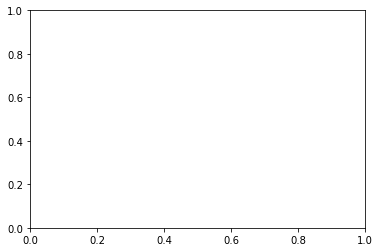

In [381]:
plt.ishold()

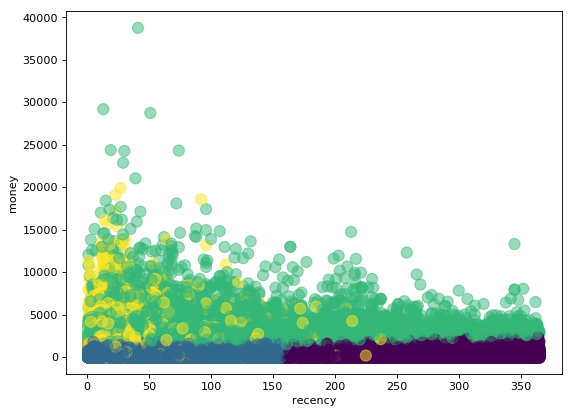

In [414]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(dataset_rfm['recency'],dataset_rfm['money'],alpha = 0.5,c=dataset_rfm['cluster'],s=100)
plt.xlabel('recency')
plt.ylabel('money')
plt.show()

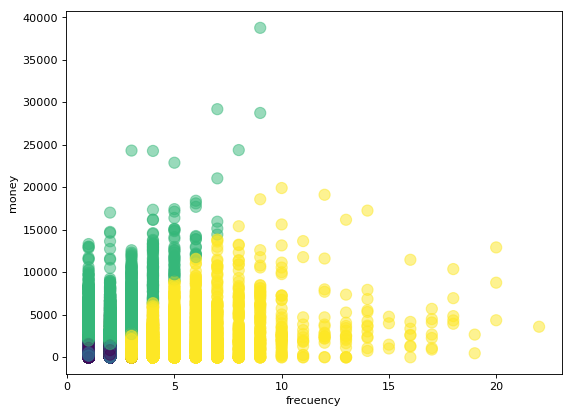

In [415]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(dataset_rfm['frecuency'],dataset_rfm['money'],alpha = 0.5,c=dataset_rfm['cluster'],s=100)
plt.xlabel('frecuency')
plt.ylabel('money')
plt.show()

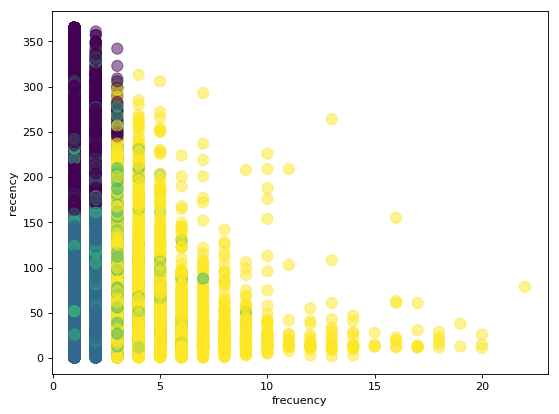

In [416]:
#vemos que el cluster morado tiene una frecuencia de compra de 3 o menos veces y han pasado como mínimo 5 meses 
#desde que realizó la última compra (clientes desvinculados)
#cluster amarillo tiene frecuencia de compra mayor de 3 veces en el año estudiado y la recencia varía desde 0 mese hasta 10 meses
#cluster azul frecuencia de entre 1 y 2 veces en el año y recencia de unos 5 meses (clientes vacacionales)
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(dataset_rfm['frecuency'],dataset_rfm['recency'],alpha = 0.5,c=dataset_rfm['cluster'],s=100)
plt.xlabel('frecuency')
plt.ylabel('recency')
plt.show()

In [ ]:
dataset_rfm.to_csv('rfm_with_clusters.csv', sep = ',')